In [2]:
import json
import sys  
sys.path.insert(0, 'notebooks/diego')

import osmnx as ox

import waste

In [3]:
df = waste.get_data()
df.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,2020-12-08,BULK,2020-12-08 15:02:00,5220.0,TDS LANDFILL,BULK,BU13,899097
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,2020-12-07,SWEEPING,2020-12-07 10:15:00,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


In [4]:
df_clean = waste.get_clean_data()
df_clean.head()

/Users/darenasc/Dropbox/Business Intelligence/Proyectos/world-data-league/data_world_league_2022/notebooks/diego/waste_management/waste.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/darenasc/Dropbox/Business Intelligence/Proyectos/data_world_league/2022/data_world_league_2022/data/clean_waste_data.csv")


,date,year,month,wday,Load.Type,Route.Type,Dropoff.Site,Route.Number,outlier,total_pop,annualised_growth,nb_loads,daily_weight
0,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,normal,700407.0,1.20%,2,8000.0
1,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,outlier,700407.0,1.20%,1,9400.0
2,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPN01,outlier,700407.0,1.20%,1,3140.0
3,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPS01,normal,700407.0,1.20%,1,5640.0
4,2005-01-03,2005,1,Mon,BULK,BULK,STEINER LANDFILL,BU27,normal,700407.0,1.20%,1,4620.0


In [5]:
df_clean['Route.Type'].value_counts()

GARBAGE COLLECTION              201068
RECYCLING - SINGLE STREAM        77246
YARD TRIMMINGS                   45878
BULK                              7898
YARD TRIMMINGS-ORGANICS           6887
DEAD ANIMAL                       6591
BRUSH                             4801
INHOUSE - RECYCLING               2748
KAB                               2345
ON CALL BULK                      1327
LITTER CONTROL                    1296
RECYCLING DEAD END                 867
RECYCLING                          775
SPECIAL PROJECT BU                 703
STORM                              573
CAP BULK                           552
SPECIAL PROJECT LC                 470
SWEEPER DUMPSITES                  152
YARD TRIMMINGS-STORM CLEANUP       137
CAP BRUSH                          111
LITTER P/U                         108
SPECIAL EVENTS                     105
HAULING                             80
CAP STORM BR                        72
CAP STORM                           63
CAP STORM BU             

In [6]:
df_gc = df_clean[df_clean['Route.Type'] == 'GARBAGE COLLECTION']
df_gc.head()

,date,year,month,wday,Load.Type,Route.Type,Dropoff.Site,Route.Number,outlier,total_pop,annualised_growth,nb_loads,daily_weight
8,2005-01-03,2005,1,Mon,GARBAGE COLLECTIONS,GARBAGE COLLECTION,TDS LANDFILL,PAM01,normal,700407.0,1.20%,2,37400.0
9,2005-01-03,2005,1,Mon,GARBAGE COLLECTIONS,GARBAGE COLLECTION,TDS LANDFILL,PAM02,normal,700407.0,1.20%,1,17960.0
10,2005-01-03,2005,1,Mon,GARBAGE COLLECTIONS,GARBAGE COLLECTION,TDS LANDFILL,PAM03,normal,700407.0,1.20%,2,29100.0
11,2005-01-03,2005,1,Mon,GARBAGE COLLECTIONS,GARBAGE COLLECTION,TDS LANDFILL,PAM04,normal,700407.0,1.20%,2,42020.0
12,2005-01-03,2005,1,Mon,GARBAGE COLLECTIONS,GARBAGE COLLECTION,TDS LANDFILL,PAM05,normal,700407.0,1.20%,2,33400.0


In [7]:
routes = waste.get_routes()
routes.head()

,rt_old,garb_day,landfill,garb_rt,super_num,op_type,garb_sup,geometry
0,None,Thursday,TDS,PAH83,697,Auto,Gilbert,"MULTIPOLYGON (((-97.70618 30.36742, -97.70723 ..."
1,PAM84,Monday,TDS,PAM54,500,Auto,Castillo,"MULTIPOLYGON (((-97.83237 30.16213, -97.83237 ..."
2,None,Monday,TDS,PAM71,596,Auto,Carnline,"MULTIPOLYGON (((-97.72977 30.19009, -97.72103 ..."
3,PAH75,Thursday,TDS,PAH54,500,Auto,Castillo,"MULTIPOLYGON (((-97.65374 30.26269, -97.65322 ..."
4,None,Wednesday,TDS,PAW71,596,Auto,Carnline,"MULTIPOLYGON (((-97.64683 30.38640, -97.64724 ..."


In [8]:
print(df_clean['Route.Number'].nunique(), routes['garb_rt'].nunique(), routes['rt_old'].nunique())
routes_with_map = []
for r in df_clean['Route.Number'].unique():
    if r in routes['garb_rt'].unique() or r in routes['rt_old'].unique():
        routes_with_map.append(r)
print('{} routes with map.'.format(len(routes_with_map)))

1321 184 91
222 routes with map.


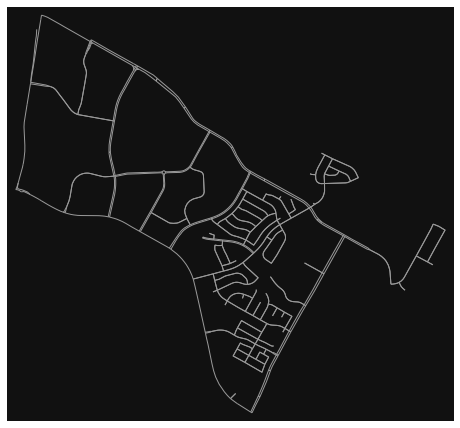

In [9]:
polygon = waste.get_polygon(routes, 'PAW71')
G_ = ox.graph_from_polygon(polygon, network_type="drive")
fig, ax = ox.plot_graph(G_, node_size=0)

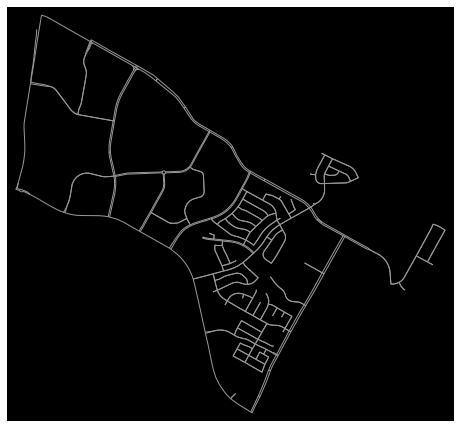

9300241.128142517

In [10]:
G = ox.graph_from_polygon(polygon, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='k')

# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

In [28]:
import pandas as pd
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

In [12]:
def get_osm_stats(G_proj):
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False);
    graph_area_m = nodes_proj.unary_union.convex_hull.area;
    osm_route_stats = ox.basic_stats(G, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean');
    return osm_route_stats

def get_graph(routes, route: str):
    polygon = waste.get_polygon(routes, route);
    G = ox.graph_from_polygon(polygon, network_type="drive");
    return G

def get_amenities(routes, route, tags={"amenity": True}):
    polygon = waste.get_polygon(routes, route);
    amenities = ox.geometries_from_polygon(polygon, tags=tags)
    return amenities

In [13]:
osm_stats = []

In [14]:
for route in tqdm(routes_with_map):
    if route in osm_stats:
        continue
    try:
        G = get_graph(routes, route)
        osm_route_stats = get_osm_stats(G)
        gpd = get_amenities(routes, route)
        osm_stats.append((route, osm_route_stats, G, gpd))
    except:
        pass

dict = {}
for fo in osm_stats:
    dict[fo[0]]['stats'] = fo[1]
    dict[fo[0]]['OSM'] = fo[2]
    dict[fo[0]]['amenities'] = fo[3]

# Saving the routes
with open('osm_data.json', 'w') as fp:
    json.dump(dict, fp)

  0%|          | 1/222 [00:02<07:27,  2.02s/it]/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-pGC2HU6v/lib/python3.8/site-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-pGC2HU6v/lib/python3.8/site-packages/osmnx/stats.py:380: UserWarning: The `clean_intersects` and `tolerance` arguments have been deprecated and will be removed in a future release. Use the `clean_int_tol` argument instead.
  warnings.warn(msg)
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-pGC2HU6v/lib/python3.8/site-packages/osmnx/simplification.py:424: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unar

KeyError: 'PAM01'

In [63]:
# route, osm_route_stats, G, gpd
# pd.get_dummies(osm_stats[0][3][['amenity']])
# osm_stats[0][3]['amenity'].value_counts().to_frame(osm_stats[0][0]).T.reset_index().to_dict()
aux = pd.DataFrame(osm_stats[0][3]['amenity'].value_counts()).T
aux['route'] = osm_stats[0][0]
aux.reset_index(drop=True)

,parking,school,pharmacy,route
0,7,1,1,PAM01


In [139]:
# pd.DataFrame(osm_stats[7][3]['amenity'].value_counts()).T
# aux = pd.DataFrame(osm_stats[7][3][['amenity']].value_counts()).T
# aux
# osm_stats[7][3][['amenity']].reset_index(drop=True).value_counts().to_frame().T
# pd.DataFrame(osm_stats[7][1])
intersection_count, street_length_total = pd.DataFrame(osm_stats[7][1]).reset_index(drop=True).loc[0].to_frame().T[['intersection_count','street_length_total']].values[0]
print(intersection_count, street_length_total)

106.0 27203.87400000001


In [143]:
dfs = []
for _ in osm_stats:
    if len(_[3]) == 0:
        continue
    aux = _[3][['amenity']].reset_index(drop=True).value_counts().to_frame().T
    aux['route'] = _[0]
    aux.reset_index(drop=True, inplace=True)
    intersection_count, street_length_total = pd.DataFrame(_[1]).reset_index(drop=True).loc[0].to_frame().T[['intersection_count','street_length_total']].values[0]
    aux['intersection_count'] = intersection_count
    aux['street_length_total'] = street_length_total
    dfs.append(aux)

df_route_summary = pd.concat(dfs, axis=0).fillna(0)

In [146]:
df_route_summary.to_csv('route_summary.csv')

In [35]:
df_with_routes = df_clean[df_clean['Route.Number'].isin(routes_with_map)]
df_with_routes['Route.Number'].value_counts()

PAW71      891
PAT72      887
PAM74      886
PAM71      886
PAM03      884
          ... 
PAS59        0
PAS79        0
PAS87        0
PASJP        0
YWNONVA      0
Name: Route.Number, Length: 1321, dtype: int64